Example 01

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [2]:
data = [100,105,102,107,110,112,115,117]
s = pd.Series(data)

In [3]:
model = ARIMA(s,order=(1,0,1))
result = model.fit()

In [4]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -21.936
Date:                Sun, 21 Sep 2025   AIC                             51.872
Time:                        18:01:26   BIC                             52.190
Sample:                             0   HQIC                            49.729
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4705      8.462     12.818      0.000      91.885     125.056
ar.L1          0.8677      0.384      2.257      0.024       0.114       1.621
ma.L1          0.0320      0.611      0.052      0.9

In [5]:
future = result.forecast(steps=3)
print("Next 3 predictions:",future.tolist())

Next 3 predictions: [115.95972016043233, 114.96894031537057, 114.10923549133534]


Example 02

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [7]:
#Step1 : LOad data
data1 = [200,202,198,203,207,210,212,215,214,217]
series = pd.Series(data1)

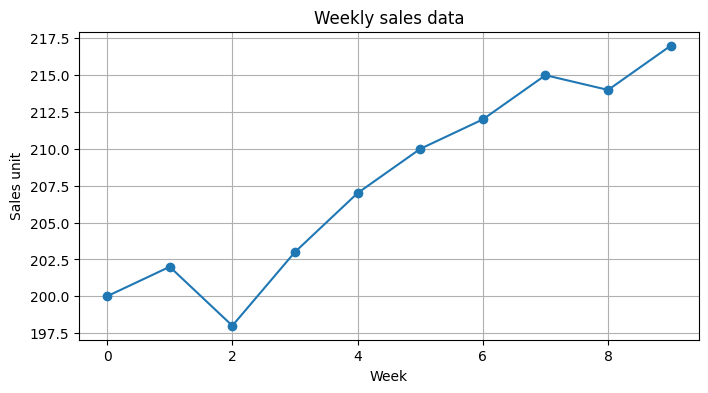

In [8]:
#Step2:Plot time series
plt.figure(figsize=(8,4))
plt.plot(series,marker='o')
plt.xlabel('Week')
plt.ylabel('Sales unit')
plt.title('Weekly sales data')
plt.grid()
plt.show()



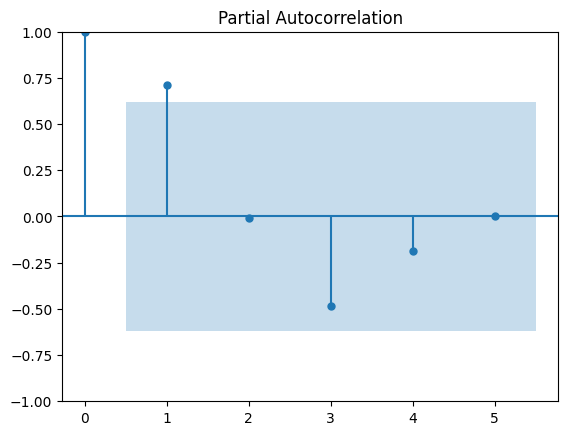

In [9]:
#Step3:ACF and PACF
plot_acf(series,lags=5)
plt.show()
plot_pacf(series,lags=5)
plt.show()

In [10]:
#Step4:Fit ARMA model
model = ARIMA(series,order=(1,0,1))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -26.529
Date:                Sun, 21 Sep 2025   AIC                             61.058
Time:                        18:01:41   BIC                             62.269
Sample:                             0   HQIC                            59.731
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.2588      6.325     32.926      0.000     195.862     220.655
ar.L1          0.8934      0.208      4.297      0.000       0.486       1.301
ma.L1          0.0806      0.443      0.182      0.8

In [11]:
#Step5:Forecast
forecast = result.forecast(steps=3)
print("\nForecast for next 3 weeks:")
print(forecast)


Forecast for next 3 weeks:
10    216.362951
11    215.499264
12    214.727623
Name: predicted_mean, dtype: float64


In [12]:
#Step6:Plot forecast
plt.plot(series,marker='o',label='Original')
forecast_index = range(len(series),len(series)+3)
plt.plot(forecast_index,forecast,marker='x',color='red',label='Forecast',linestyle='--')
plt.title('Forecast using ARMA(1,1)')
plt.legend()
plt.grid()
plt.show()

EXAMPLE 03

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf

In [16]:
#Step1:Load dataset
df = pd.read_csv('/content/temperature.csv',parse_dates=['Date'],index_col='Date')
df.head(4)

Temperature
Date                   
2024-01-01         13.7
2024-01-02         17.0
2024-01-03         12.6
2024-01-04         13.9

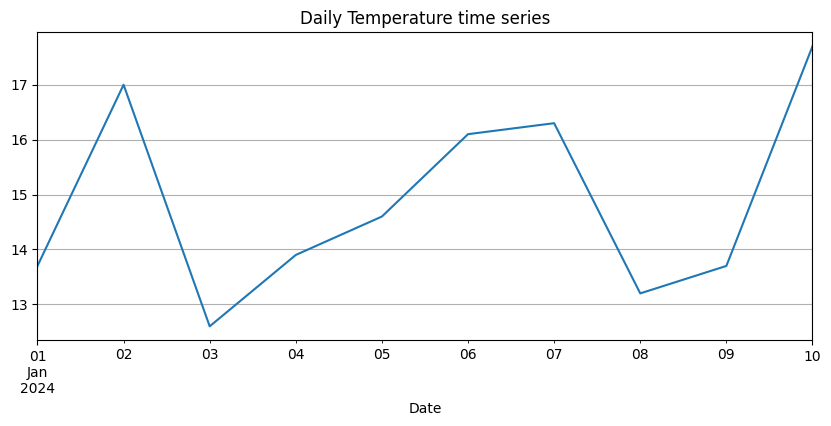

In [17]:
#Step2:Visualize the data
df['Temperature'].plot(title='Daily Temperature time series',figsize=(10,4))
plt.grid()
plt.show()

In [18]:
#Step3:Calculate and plot autocovariance manually
def autocovariance(x,lag):
  x_mean = np.mean(x)
  n = len(x)
  return np.sum((x[:n-lag]-x_mean)*(x[lag:]-x_mean))/n


In [19]:
#Print autocovariances for lags 1 to 5
for lag in range(1,6):
  cov = autocovariance(df['Temperature'].values,lag)
  print(f"Autocovariance at lag {lag}: {cov:.4f}")

Autocovariance at lag 1: -0.7166
Autocovariance at lag 2: -0.8805
Autocovariance at lag 3: -0.0575
Autocovariance at lag 4: 0.5096
Autocovariance at lag 5: 0.5768


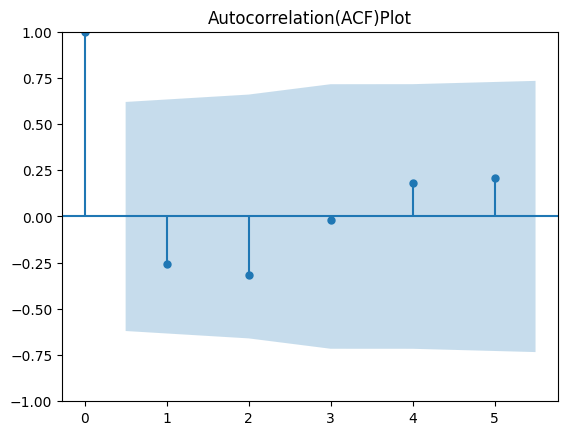

In [20]:
#Step4:Plot autocorrelation function(ACF)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Temperature'],lags=5)
plt.title("Autocorrelation(ACF)Plot")
plt.show()

In [21]:
#Step5:Build and Train an autoregression(AR) model
ar_model = AutoReg(df['Temperature'],lags=3)
ar_result = ar_model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
#View coefficients
print(ar_result.summary())

                            AutoReg Model Results                             
Dep. Variable:            Temperature   No. Observations:                   10
Model:                     AutoReg(3)   Log Likelihood                  -9.965
Method:               Conditional MLE   S.D. of innovations              1.005
Date:                Sun, 21 Sep 2025   AIC                             29.931
Time:                        18:04:11   BIC                             29.660
Sample:                    01-04-2024   HQIC                            26.588
                         - 01-10-2024                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             35.2238      9.600      3.669      0.000      16.409      54.039
Temperature.L1    -0.1639      0.314     -0.522      0.602      -0.779       0.451
Temperature.L2    -0.8162      0.269

In [23]:
#Step6:Make predictions and plot
#Predict next 10 values
forecast = ar_result.predict(start=len(df),end=len(df)+9,dynamic=False)
print("Forecast for next 10 values:")
print(forecast)

Forecast for next 10 values:
2024-01-11    16.077325
2024-01-12    12.886661
2024-01-13    13.199644
2024-01-14    16.375034
2024-01-15    16.823071
2024-01-16    14.037814
2024-01-17    12.910547
2024-01-18    15.196774
2024-01-19    16.810567
2024-01-20    15.112460
Freq: D, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


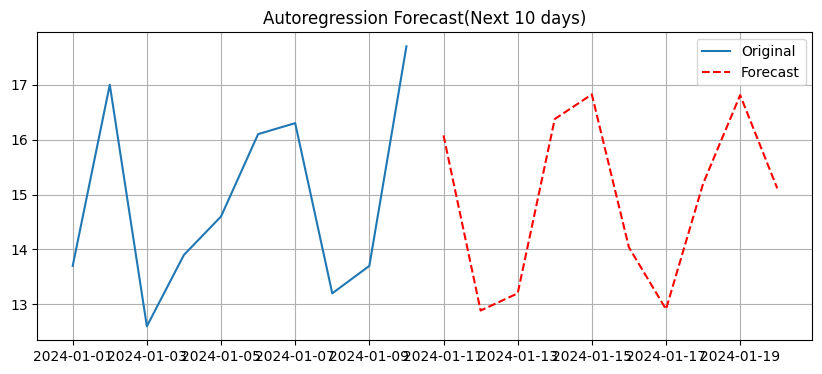

In [24]:
#plot original data and forecast
plt.figure(figsize=(10,4))
plt.plot(df['Temperature'],label='Original')
plt.plot(forecast,label='Forecast',color='red',linestyle='--')
plt.title('Autoregression Forecast(Next 10 days)')
plt.legend()
plt.grid()
plt.show()